In [30]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

### 二分类模型

In [32]:
# 数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names[:-1]
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2], 
                                                    test_size = 0.5, random_state = random_state)

# 模型
classifier = svm.LinearSVC(random_state = random_state)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_score = classifier.decision_function(X_test)
print(y_test)
print(y_pred)
print(y_score)

[1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0
 0 0 0 1 1 1 1 0 1 1 0 1 0]
[0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 1]
[-0.2   0.3   0.2   0.28  0.43 -0.15 -0.09 -0.13  0.23 -0.24 -0.06 -0.15
 -0.05  0.1   0.05 -0.11  0.16  0.05 -0.08 -0.26  0.25 -0.18 -0.38  0.26
  0.13 -0.04  0.39  0.42 -0.48 -0.31 -0.09  0.01 -0.2   0.4  -0.05  0.12
  0.06 -0.07  0.   -0.4   0.03  0.2   0.07  0.5  -0.28  0.31  0.19  0.12
  0.03  0.22]


#### Confusion Matrix

In [11]:
np.set_printoptions(precision = 2)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print(cm)
print(TN, FP, FN, TP)

[[17  7]
 [ 5 21]]
17 7 5 21


正规化后的混淆矩阵：
[[0.71 0.29]
 [0.19 0.81]]
没有进行正规化的混淆矩阵：
[[17  7]
 [ 5 21]]


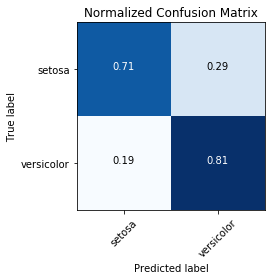

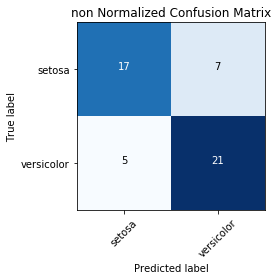

In [12]:
# print and plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize = False, title = "Confusion Matrix", cmap = plt.cm.Blues):
    """
    # print and plot the confusion matrix
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('正规化后的混淆矩阵：')
    else:
        print('没有进行正规化的混淆矩阵：')
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '0.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, 
                 i,
                 format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cm, classes = class_names, normalize = True, title = "Normalized Confusion Matrix")
plt.figure()
plot_confusion_matrix(cm, classes = class_names, normalize = False, title = "non Normalized Confusion Matrix")
plt.show()

In [31]:
FPR, TPR, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
auc_score = auc(FPR, TPR)
print(FPR)
print(TPR)
print(thresholds)
print(roc_auc)
print(auc_score)

[0.   0.   0.   0.04 0.04 0.08 0.08 0.17 0.17 0.21 0.21 0.25 0.25 0.29
 0.29 0.46 0.46 0.58 0.58 0.67 0.67 1.  ]
[0.   0.04 0.42 0.42 0.54 0.54 0.62 0.62 0.65 0.65 0.69 0.69 0.81 0.81
 0.85 0.85 0.92 0.92 0.96 0.96 1.   1.  ]
[ 1.5   0.5   0.23  0.22  0.19  0.16  0.12  0.1   0.07  0.06  0.05  0.05
  0.01  0.   -0.04 -0.07 -0.09 -0.13 -0.15 -0.18 -0.2  -0.48]
0.8509615384615385
0.8509615384615385


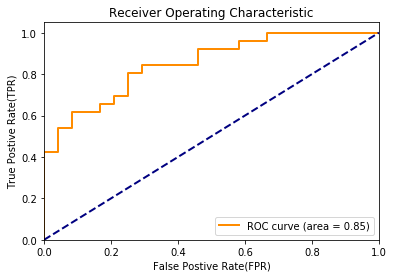

In [28]:
def plot_roc(FPR, TPR, roc_auc):
    plt.figure()
    lw = 2
    plt.plot(FPR, TPR, color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Postive Rate(FPR)')
    plt.ylabel('True Postive Rate(TPR)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = 'lower right')
    plt.show()

plot_roc(FPR, TPR, roc_auc)

### 多分类模型

In [35]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [41]:
# 数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
y = label_binarize(y, classes = [0, 1, 2])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

# 模型
classifier = OneVsRestClassifier(svm.SVC(kernel = 'linear', probability = True, random_state = 0))
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_score = classifier.decision_function(X_test)
print(y_test)
print(y_pred)
print(y_score)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]]
[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 1 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [0 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]


### 模型表现

In [50]:
FPR = dict()
TPR = dict()
roc_auc = dict()

for i in range(n_classes):
    FPR[i], TPR[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(FPR[i], TPR[i])
    # roc_auc[i] = roc_auc_score(y_test[:, i], y_score[:, i])

FPR['micro'], TPR['micro'], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc['micro'] = auc(FPR['micro'], TPR['micro'])
print(FPR)
print(TPR)
print(roc_auc)

{0: array([0., 0., 0., 1.]), 1: array([0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.07, 0.07, 0.11, 0.11, 0.2 ,
       0.2 , 0.31, 0.31, 0.33, 0.33, 0.36, 0.36, 0.4 , 0.4 , 0.51, 0.51,
       0.56, 0.56, 0.58, 0.58, 0.62, 0.62, 0.64, 0.64, 0.67, 0.67, 1.  ]), 2: array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 1.  ]), 'micro': array([0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.04, 0.04,
       0.05, 0.05, 0.09, 0.09, 0.14, 0.14, 0.16, 0.16, 0.17, 0.17, 0.17,
       0.17, 0.19, 0.19, 0.22, 0.22, 0.28, 0.28, 0.31, 0.31, 0.32, 0.32,
       0.35, 0.35, 0.35, 0.35, 0.37, 0.37, 1.  ])}
{0: array([0.  , 0.05, 1.  , 1.  ]), 1: array([0.  , 0.03, 0.03, 0.1 , 0.1 , 0.2 , 0.2 , 0.23, 0.23, 0.37, 0.37,
       0.4 , 0.4 , 0.7 , 0.7 , 0.73, 0.73, 0.77, 0.77, 0.8 , 0.8 , 0.83,
       0.83, 0.87, 0.87, 0.9 , 0.9 , 0.93, 0.93, 0.97, 0.97, 1.  , 1.  ]), 2: array([0.  , 0.04, 0.79, 0.79, 0.96, 0.96, 1.  , 1.  ]), 'micro': array([0.  , 0.01, 0.33, 0.33, 0.55, 0.55, 0.6 , 0.6 , 0.63, 0.63, 0.73,
     

In [59]:
from scipy import interp

all_FPR = np.unique(np.concatenate([FPR[i] for i in range(n_classes)]))

mean_TPR = np.zeros_like(all_FPR)
for i in range(n_classes):
    mean_TPR += interp(all_FPR, FPR[i], TPR[i])
mean_TPR /= n_classes

FPR['macro'] = all_FPR
TPR['macro'] = mean_TPR
roc_auc['macro'] = auc(FPR['macro'], TPR['macro'])

print(FPR)
print(TPR)
print(roc_auc)

{0: array([0., 0., 0., 1.]), 1: array([0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.07, 0.07, 0.11, 0.11, 0.2 ,
       0.2 , 0.31, 0.31, 0.33, 0.33, 0.36, 0.36, 0.4 , 0.4 , 0.51, 0.51,
       0.56, 0.56, 0.58, 0.58, 0.62, 0.62, 0.64, 0.64, 0.67, 0.67, 1.  ]), 2: array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 1.  ]), 'micro': array([0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.04, 0.04,
       0.05, 0.05, 0.09, 0.09, 0.14, 0.14, 0.16, 0.16, 0.17, 0.17, 0.17,
       0.17, 0.19, 0.19, 0.22, 0.22, 0.28, 0.28, 0.31, 0.31, 0.32, 0.32,
       0.35, 0.35, 0.35, 0.35, 0.37, 0.37, 1.  ]), 'macro': array([0.  , 0.02, 0.02, 0.04, 0.04, 0.07, 0.11, 0.2 , 0.31, 0.33, 0.36,
       0.4 , 0.51, 0.56, 0.58, 0.62, 0.64, 0.67, 1.  ])}
{0: array([0.  , 0.05, 1.  , 1.  ]), 1: array([0.  , 0.03, 0.03, 0.1 , 0.1 , 0.2 , 0.2 , 0.23, 0.23, 0.37, 0.37,
       0.4 , 0.4 , 0.7 , 0.7 , 0.73, 0.73, 0.77, 0.77, 0.8 , 0.8 , 0.83,
       0.83, 0.87, 0.87, 0.9 , 0.9 , 0.93, 0.93, 0.97, 0.97, 1.  , 1.  ]), 2: array

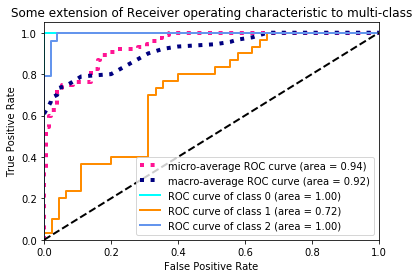

In [63]:
from itertools import cycle
def plot_multiclass_roc(fpr, tpr, roc_auc):
    # Finally average it and compute AUC
    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})' 
             ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})' 
             ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
    
plot_multiclass_roc(FPR, TPR, roc_auc)